In [1]:
import numpy as np
import cv2 as cv
# from PIL import Image
import pickle
import matplotlib.pyplot as plt
import imghdr
import os
import random

### Brute-Force Matching with ORB Descriptors

In [4]:
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage

In [5]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

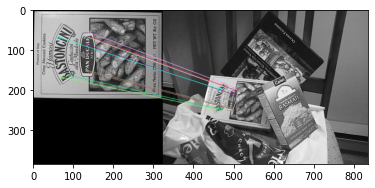

(<matplotlib.image.AxesImage at 0x2522c79c5b0>, None)

In [6]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [7]:
def fmatch(img1, img2):
    # Initiate ORB detector
    orb = cv.ORB_create()
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return plt.imshow(img3),plt.show()

In [8]:
coffee1 = cv.imread('retail_corpus_scraper/renamed_images/22_delwyn-coffee-table-3m_1024x1024.jpg',cv.IMREAD_GRAYSCALE)
coffee2 = cv.imread('retail_corpus_scraper/renamed_images/23_belwyn-coffee-table-3m_1024x1024.jpg',cv.IMREAD_GRAYSCALE)

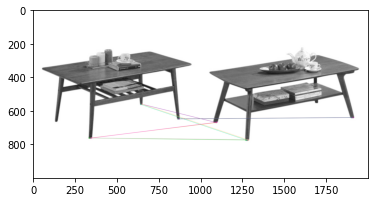

(<matplotlib.image.AxesImage at 0x2522c89fb20>, None)

In [9]:
fmatch(coffee1, coffee2)

### Brute-Force Matching with SIFT Descriptors and Ratio Test

In [10]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

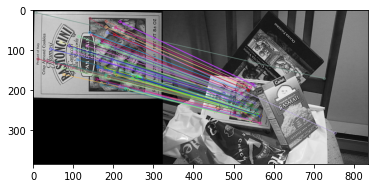

(<matplotlib.image.AxesImage at 0x2522c8d9640>, None)

In [11]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [12]:
??cv.drawMatchesKnn

### FLANN based Matcher

In [13]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

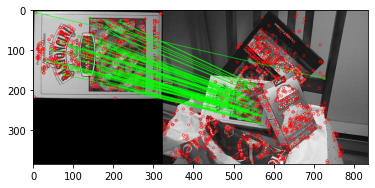

(<matplotlib.image.AxesImage at 0x2522c950850>, None)

In [14]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

## --End of Tutorial--

In [9]:
imghdr.what(os.path.join('retail_corpus_scraper/renamed_images/', '0_fico-sofa-bed-sr_1024x1024.jpg'))
# OR imghdr.what(image_path)

'jpeg'

In [39]:
# types of images in corpus

root = 'retail_corpus_scraper/renamed_images/'
for image in os.listdir(root):
    imagetype = imghdr.what(os.path.join(root, image))
    if ((imagetype != 'png') & (imagetype != 'jpeg')) & (imagetype != 'gif'):
        print(image, imagetype)
        
# image types: jpg, png, .jpg None, None type, .gif

15047_sy-f311t_f320b_f310c_1.jpg None
21821_sy-f311t_f320b_f310c_1.jpg None
21961_810-1.jpg None
22189_position.jpg None
23375_ql10227-wh-cl_sheepshape_dicut.jpg None
23375_ql10227-wh-cl_sheepshape_lifestyle_1_.jpg None
23628_ql10217-wh_cloud_pot_diecut1.jpg None
23628_ql10217-wh_cloud_pot_diecut2.jpg None
23628_ql10217-wh_cloud_pot_diecut3.jpg None
23628_ql10217-wh_cloud_pot_lifestyle1.jpg None
23630_ql10227-wh-cl_sheepshape_dicut.jpg None
23630_ql10227-wh-cl_sheepshape_lifestyle_1_.jpg None
25673_Side_Table_Singapore_4_6bed8378-9850-4588-a6d3-1ec3fbd44708.jpg None
25673_Side_Table_Singapore_6.jpg None
25724_HerringDiningtableSingapore2_75856906-4902-46d8-8adf-9d8b63018c06.jpg None
25803_Decorative_tray_Singapore_1.jpg None
25843_Floor_Mirror_Singapore_4.jpg None
25849_Feather_Tray_4.jpg None
25894_Decorative_tray_Singapore_1.jpg None
25899_Feather_Tray_4.jpg None
25915_Floor_Mirror_Singapore_4.jpg None
25964_rugs_singapore_stripes_megan.jpg None
25964_rugs_singapore_stripes_megan_2.j

26097_04f230525cddc5d2f94d1efb01a80a18_tn None
26097_185a2e39ad3d68fedd813b692516d11c_tn None
26097_1a67548a6453a9400d59ba595d7f942b_tn None
26097_a89b674b8214c588fe6bf6c8d7acec7d_tn None
26103_01a645ce77bac5da4aca36da224beda3_tn None
26103_169b0dffb0dc78790fcea33787cafdf3_tn None
26103_836ef949c67a5089bddba7e342c62d3b_tn None
26103_84cc4c9e637a391bee2d01b01c77daed_tn None
26103_c16370532ed517d9ae7e0d92681ff398_tn None
26106_1806134ea73bc090259bfdd6e9b134bf_tn None
26106_60273f939262f1aaae949de95b4145e3_tn None
26108_4d29c88451e2a02ebefc636b08796ec1_tn None
26108_5b5774e32124c6467a9735194ea2c0fd_tn None
26108_b555fc2de993dc9479aa18bf5552eae4_tn None
26108_b8fa8e261d6a8a4a0a7b1ec2d861bcea_tn None
26108_d7f8f9bb314517f5bf046cd317a341da_tn None
26111_48561c853a3ca1aab1d8904f99b1a82c_tn None
26111_4ac82ad2b1c638f108489ba9a2f3d959_tn None
26111_b324a87290959e5d87e91878686b560f_tn None
26120_daaed6a5cada727a3f287f346677e605_tn None
26121_cf0d2304b9fbbfab963efd16c49f7fb7_tn None
26131_7a91e84

26216_079608cfb943dbf126391e0cd112f235_tn None
26216_625998a7aa819ffc23ee88a311ac9b1f_tn None
26218_0ca2c64b922947d9b1172dc558478b68_tn None
26218_39be6ffc8c46fec0c98c4ba967e848b4_tn None
26218_5b8b9db3a20e90f2f435ff9411876227_tn None
26218_defa2f652f2e9042170c77393c3c183c_tn None
26218_e6f7aa55d704d160eda06526af6d3968_tn None
26219_1faa77129f43fdbac5c6cb39fcef0f8a_tn None
26219_305406d26af83844ea9e6c9ecef23582_tn None
26219_36aabc2ec765e92c342ee060baf165f3_tn None
26219_401b656ac6c3d9816c092db5d0241061_tn None
26219_5ac683816f47f60152d1fc384a3044b3_tn None
26220_118dc90f35a7c54426bbd0df932e1cea_tn None
26220_a50910ea6f8247c86541e753e0e7b0a0_tn None
26220_b8891cbc40a3f98cb08a2725f1deb7d0_tn None
26220_d34207f87799c5073b0146702b6af5c5_tn None
26220_f58b2d582f5f8c069af5a97e951249c1_tn None
26221_272f401b8f2d4ac156c54ad7bc4a5e02_tn None
26221_cbf3ba39044bbb725bab44cb48f41401_tn None
26221_d1a06d505d7cb53fa2a9f7379580d35d_tn None
26221_f10d3e92329e04a6b4a7d76282cdb14c_tn None
26221_f64fc29

26333_013d37601179edce26cfeabe5fd033a9_tn None
26333_5f7533e47d01cae5050a977f89b0430b_tn None
26333_a42f61d38ee906d666e0b5d8f4aa420e_tn None
26333_c9b66c523093472759d5cf62ce82fc87_tn None
26333_cf63f19ad49757df58c33e9a6f186e48_tn None
26336_2488a3401a299ec28a0714d9bc99c633_tn None
26336_42fd46c1436237b8e5887786448304a6_tn None
26336_5bb158d524b0023a623b90a6c5832e26_tn None
26336_b3348c2fdb176da518c66cf83ef7d35d_tn None
26336_ef871e702d61219a434a0f1bc542a9bb_tn None
26339_0a3ad0ece91ec9ddba3827dde701ce55_tn None
26339_0a46dfe8679450bdfbc9175506a4f930_tn None
26339_56fb653a95ad3460b39e0ae0dd3f5ab7_tn None
26339_7ca6de0eedee4936469173d93a1d2002_tn None
26339_d79133af5f5808b140ea3178706f0d03_tn None
26345_4b570cab7a9d5d6d9d2f86cdc9091fe8_tn None
26345_76c15afb61c517cb466dc9ff28d1eba1_tn None
26345_8d0a010fe9292867c03f75f54a29e3e9_tn None
26345_b39787c21cec9c2c50bdf13fcd29517d_tn None
26345_e1e277e86e656f4981adc2bfa4a40cd6_tn None
26347_3e2ed5e30887a4466a4258053632f9a9_tn None
26347_8a97cc7

26424_0f1fa643cb93954c8f3865350e57b8c5_tn None
26424_1c493ecb5a04b6cbc31e642429847499_tn None
26424_98874858f87552bb08e484cd8dd2f7bc_tn None
26424_dc69654d6071729a9a35fec7933738e6_tn None
26424_f797955f775059f7d7ecc727309add4e_tn None
26425_15ba800b92cfd00dc7928837dd925d61_tn None
26425_658a660a4e4e7bd9373da2af1301e45b_tn None
26425_8e23098c10d65e68c83db958c1639d30_tn None
26425_bc98ca62609d3dcbfdb32dac0c3d431d_tn None
26425_dacaa6e0e0b0b8fbae6277852daf6fe4_tn None
26426_06f4087c37b8ad652509dff3bb241400_tn None
26426_351473bb6f982b618e0a921d9eb3dfda_tn None
26426_537782342ebd763ff76604e44ae7a703_tn None
26426_77b31e51d578e5c46057116f7b534d8c_tn None
26426_ddd68d2c6b36ad18ed400f56765bc081_tn None
26429_1c42d1106935573e1fca3af57b2986ac_tn None
26429_58c19f93b283ba0f6c95038860f29302_tn None
26429_7995e1b6c24a6a8dd6a4aaf26008a0bd_tn None
26429_f630bc13e3d3b1c0dcdd36c7bb375ad4_tn None
26429_fed82c48dbfb1809109b749303eca0b1_tn None
26431_0acce8ae5442bc36f94bfa0192be25b0_tn None
26431_213f4d1

26541_ef21316bd8c96a76ecb3891b3b8995d3_tn None
26542_153e66a63174affc72fb4358e5103faf_tn None
26542_3c83c6fabc64110713c2957c18f63f2d_tn None
26542_7f1f9e8371516b44377b2183e66814c0_tn None
26542_a7223b833a2d26e37554e69c6d91e87e_tn None
26542_f7daa4c4508cfc483aebac50ed86d78b_tn None
26546_7b3a5c0d48365faf17b4b96e3ad803bf_tn None
26546_a42d873c8b3f301830c235218d12c723_tn None
26546_e3d7a0d17e4ae8d00b14773ec4f29604_tn None
26546_f6a0429b34cdc7dc42991154697e3209_tn None
26549_34f4b6b985d61c36067c33b01e11aa11_tn None
26549_408d5f4314781b832090f654346fde20_tn None
26549_5a789cf3d42924e0730ced5da67636ac_tn None
26549_e026fe429b8a4d1800018f0f5642625b_tn None
26551_0bcbc95810ed59921429096a37b1a2da_tn None
26551_0cec2e889fcfe8ba798e2f755a780d7b_tn None
26551_1cf59fa3d494e199c02df7ce63c7084e_tn None
26551_9b9a2102c57e3d0621ced3811fae1aef_tn None
26551_ba1a8f05fa3092ea49f7446d343d07e0_tn None
26552_543c6b5e3a49a39ff6b3950de4ba0894_tn None
26552_688e5e0b53a14b919e07e0d12f1d23d4_tn None
26552_e3efc02

26649_7e9d064918c52310b03573512e557fb4_tn None
26651_19247340497cb8fcf75a2da2d74beea5_tn None
26651_24a51bc7fa31a071aa671bd9ae9bf138_tn None
26651_27254f2580a484d742f233b142a5e29c_tn None
26651_cfe035c17ec21b051c54e38387d837a0_tn None
26651_fe0420a4893ff87da7eaef34d9855d70_tn None
26652_0c5710c58c6f086f497a2e2202c90a5b_tn None
26652_6b022bc162747026ca9091e0eeb5db94_tn None
26652_8da0d749e3834ac3e348c2d2bcafe9e6_tn None
26652_931fa0aaedb95ff053c3a2d272ef7780_tn None
26652_bfd4500f09d3674b53377ee2b1f8137e_tn None
26655_0331f669c8dfba50815cbaf3d408d0c2_tn None
26656_1c91d91aabc8de1c90cc292430edfc15_tn None
26656_aa48674143fb40ce9e1975ccd86a43cf_tn None
26656_b06384d62d6738f8ae00545f2f84c44d_tn None
26660_48f4c0f7db2ed7272c9301ad9cd70b1a_tn None
26660_97006c2136423ee78d25e0a01bed540e_tn None
26660_98823bf5c49fed0f7fac8a86ecc8a6ab_tn None
26660_a13ac8a4fededb29989864ae2ab83086_tn None
26660_bdc8b870e88737509fd02fecc14501ed_tn None
26664_1495ced1cb712adffc9b508c4c2b07f7_tn None
26664_1ad85ec

26775_72349ccfed724fc1cc6184934b5edf46_tn None
26778_175afb68854428e3d0c9ab3485138ac8_tn None
26778_34df69da58652d8d9df5c4d2231fe588_tn None
26778_837f3479d13ebfaf19375fd3d04536ab_tn None
26778_89f472521d689614b1d5a8bf2b7083bd_tn None
26778_b34863ca07c7bab7a49f8bb2c60eb64d_tn None
26780_32faf33f3be7cfc07310d3bd264cd913_tn None
26780_50902258a595972015838aa16d2291f0_tn None
26780_78cb7c1dc5150b7a37069a896eac847a_tn None
26780_ac15fae28cf6c624c09ecbb98ccee974_tn None
26780_e3b6dc467c24f036f2359bfc2b84f51d_tn None
26785_0056213e647cfec5644c13c2bf3037bf_tn None
26785_468ad3d80a4091892d33fdb8acf84968_tn None
26785_737231a655c39a333efc5f39608968f7_tn None
26785_b843e297a778b408f8b420d044a987ea_tn None
26787_152164c2db4f34b545f48da697c8e065_tn None
26787_420794ea2b98a768f5f90c774814b6d9_tn None
26787_57b812c6aa636fd5642b009ace437197_tn None
26787_5bdaae363b1919627587c18fe032d058_tn None
26789_1ec276de29206a1fc706d420409bc12b_tn None
26789_71ac89667dce30a212e60b48aa4ac6c0_tn None
26789_89cb481

26886_4f49468c51c4008317016206ba84c9a4_tn None
26886_780bc8448f3035edf7f58f0bd55a7528_tn None
26886_8091308416343d11be576b765f58a3fc_tn None
26886_ab0c6dd2918245cbfc93958a0a0b2553_tn None
26886_cb69a9dde0e7a9824b1e98d4723d0491_tn None
26887_1c15e849f919164a8faae1d077924d60_tn None
26887_4e1a85b4abf51c8175e4a9b32c72ef23_tn None
26887_cb384adf4150b8dbfe205e45770dc33d_tn None
26888_8fa019940e287f4089c0b9cd6cd3b161_tn None
26889_26ea4eafe4d1b0ca0da78f19195ebb83_tn None
26889_29da2ef8f7dd6b9cb91853776886dee5_tn None
26889_5331b082c675bbe9da4a34a969845d8c_tn None
26889_70e9d69d0a874c41ceb9acaa845ea4c7_tn None
26889_9329a4298e0dfc2c8c54a75dcdd4a1df_tn None
26892_c4bfa6c3d994bc55f7903b832b9acfc1_tn None
26894_0f8622ef521da42ed4f0a6b3d36e95a8_tn None
26894_2a1d9d7963929f3c58da1ffc05de8fb1_tn None
26894_44fac7623b787762d3b4c10dab29abca_tn None
26894_a655ea8fbb465304bd1401ee02f0937e_tn None
26896_2e8c18bb36e1185f47b8f68c3095009f_tn None
26896_2f63a81caf99d1d555190e0ff46a9cc9_tn None
26896_389e071

27006_c1aba578b89d0d3321e696f79be4edab_tn None
27006_c6a6c1bbacafe7637cc31c94c3a980fd_tn None
27009_3560b42a8a17feeea5a70f0b57db2a46_tn None
27009_b9d2855712a65e487b0fdb45bd204343_tn None
27009_d0c638c1ed17defafa9408b67056f5ef_tn None
27010_362c9615e722f21e0f18897d880e9b27_tn None
27010_4a4e389689bbb832188db18f3adc08c2_tn None
27010_77c27d9e2045fdbfebbb0b5a186494c7_tn None
27011_0a9084dc3b6b4ae2f234c1aabb1b0dee_tn None
27011_31f0ae77821c760b02c50d438291bfd6_tn None
27011_72af687c1f5b5fb67dd316062d86bba1_tn None
27011_73f09484891863723327617d39cf9da3_tn None
27012_54da6059663772d83024d91a5ca7a851_tn None
27013_44266036b13907be89aaa3554fb9db52_tn None
27013_4554979385fa217ebb554b34c191954c_tn None
27013_472b2826c05a1b730ae746c5f7216635_tn None
27013_4737c086fbb4e25713e294d3869dad83_tn None
27013_9bcd29874d9083b65a86a56cab3c204a_tn None
27014_5886f9579fffa016d48f66ff03428d05_tn None
27014_824b30878074c6085623d8c0653c3c11_tn None
27014_89806b8e3fd73a104b843d196f2456db_tn None
27017_053f27d

27103_677d1489e1042a97cd0557935b118d4b_tn None
27105_7da7cb2d52c2e1936c3f5b3a650f0eac_tn None
27105_863eb9b67b047bec6c5c7a8492ad63ed_tn None
27105_9fbaeb49f4fb1f46810f6d08f8053e2a_tn None
27105_d4c0b4808a4deb64c01b7f9339be07f7_tn None
27105_e89642700ccc13e4d472c68b07e911c9_tn None
27106_5e0f65b09eef7a644abe3ab705be4f1e_tn None
27106_a409e0f1c35601af043b48dbc6b30967_tn None
27106_b3573b84b4a5d1cdece97b0df2d3e4e0_tn None
27107_c66d77666f166a82292c7d79632bbd1b_tn None
27108_0d485763472aa40f0203fd053b772fc4_tn None
27108_25f5b0b4e363fba22cbb49054648668d_tn None
27108_5d46b2d1bb1be9661ca0987f10b8cb8e_tn None
27108_d3ff05e415f685e33bbf2b77967181b5_tn None
27108_de580d1e7e227e8876236edfc442a466_tn None
27109_0dd7a219eba138f37c4eda8eda61b0fd_tn None
27109_6d5c252904d286e2dbca4676e6d15929_tn None
27109_747377af0f736d777387fb04edb1d93d_tn None
27109_c9b53493cbf4412093efab2f1a22c3a1_tn None
27109_d8a7a92281b85d2ddfbb116a92a4dfb0_tn None
27111_59d239612b56005fc852ffdf2d9e5bf0_tn None
27111_713de23

27214_18363e63ea6b1d1d07bf595ce1e6b465_tn None
27214_463e655c8518c3148203f9ec29b1eb7b_tn None
27214_9800e38aaf5bed51f6b45ee11f97c2d8_tn None
27214_a9293acdf497ae890ae4e66dfacff4e7_tn None
27214_c636e4e3c294acc78308accb7c70aade_tn None
27215_125e7272343d023eb02662dc3a7615b5_tn None
27215_468835f1f7a91861803747bd9dad0003_tn None
27215_63854bfa87c5dfc2407a220e6cb70944_tn None
27215_f74f2b6cc5d007ee760f0e115854d9f0_tn None
27216_05a9bbb58bbe25abfd7c2bb3ced7d06e_tn None
27216_46859aeb7530297d951c8386faef3bb4_tn None
27216_688c87e0927be896469ff7043ab636f2_tn None
27216_8846601e1d3c64686ed22abe760e2490_tn None
27216_e314ccd2740e771fbfe986e2b805a88f_tn None
27218_3be209ffd818ca01468709ad956d911d_tn None
27218_64dcf2b1dc20656b9b7624c4941b8ab8_tn None
27218_7deffb0c52bb210b2c3ef5db2b2538eb_tn None
27218_9a3a300af1cf731764e136907fea88a0_tn None
27221_7815a17ab20c59f0bf81d63f98a8eea9_tn None
27221_cbe16fee48a564bca64dbd8db7b73851_tn None
27221_ccdec33518dde947f5c659e89895124c_tn None
27225_3314c95

27309_6d5de08422d560082aeba6f0be2f0c3f_tn None
27309_b1d1da2ea0c1045ac6ed0401598630d2_tn None
27309_d120ee5deb1ed53f055d636fbc9d4b92_tn None
27310_5c285b5adac40405ef06a02edbc6e6bf_tn None
27310_9c849729c8964a2f3fcb4d5db8aa4256_tn None
27310_9e7f0a919605fb8ce79dd23cb6194d10_tn None
27310_a5105fbeb40fb095d6e3388cf0b1ea90_tn None
27310_d6e115de38d4c6e24a6c227c336d9eb7_tn None
27314_01a51bac53d41b3c29a8c346118bb33d_tn None
27314_5f15b0353f316e2e586411aeb5b52def_tn None
27314_84dc78f89a1c777c444c988140095baa_tn None
27314_a30bc4b3a2879ea4556e308e400bf664_tn None
27314_b5aad7542f801c2294e83c44363e164f_tn None
27316_e04f54e1c3496de6a657a050fe5549e1_tn None
27317_050b5375b14c045b1dcc9f84ec87aec7_tn None
27317_1a04147e9bcfc52156f012b630e7291e_tn None
27317_4db5f79964c6c1c2b1d0010cd66b4c89_tn None
27317_631c1df46bf1fa4b93f90b92e8d5bf16_tn None
27317_caafc6f85306c2fbe650c4fbf18c76c7_tn None
27318_766a341639587b0109c9ea869fdcb491_tn None
27318_e1a1d8e06a81de6b2efb509973361bd9_tn None
27318_ed5bae9

27490_41e734b88b432d655bfc4c113c39850c_tn None
27490_5afbcc5d7f742d79013b995fdf364a11_tn None
27491_2c5ff559d931ef05f3f0b8713a6a8573_tn None
27491_ba2aee0be61471cb936a11cf2db51abb_tn None
27491_fe9e87df05339c2cd1ef06c1b54f930b_tn None
27492_23f7b21b19e6318277c8919abe40437f_tn None
27492_31ce2a547e35743c8e838c688a28844b_tn None
27492_85241219f8acd8012f734ab5a7d0d976_tn None
27492_bafb050c01f2bad376eced2decc29e3e_tn None
27492_caaf1838645ffb9f98da9ed0bb4ab1c4_tn None
27496_5336a91d99e75fbb0e8b0f404df1119c_tn None
27497_9732c8ac170f69875f93c7fe25c9ea2a_tn None
27497_d198a25dc6862b403c0911970df16700_tn None
27500_6c4f681f93160ce113a74e290e04b96b_tn None
27501_0597183e182da3b5d7ada8fb89b9f837_tn None
27501_844b66b5e6849f33b63ea0d54515e3c1_tn None
27501_a9aaa53b3332292597da86131a811226_tn None
27501_df8ed393de0b2072e2666c1406a6fa2d_tn None
27501_e99ca87d63c183480a45af08d574461a_tn None
27502_33feb729c43915bb5dd1608f4ca687e0_tn None
27502_9d5d61569a427caca1419e23b5e8c6e1_tn None
27502_c087bc8

27673_568de0afad5bdf46032288fedf27ced1_tn None
27673_d319687230eec4e686a40485a3e915ad_tn None
27675_06f663ef7dd40ff59a43e14b167d3112_tn None
27675_70ebb4ba2ec61b723cc56e568aa73e71_tn None
27675_b5c2449e76a3e9a34c158f2713d3d449_tn None
27675_c2db9c39a6a45393d3ba63399ffc979b_tn None
27675_fd322b1d7c2e52d17dff496685aebb5b_tn None
27679_5d89340aa0e20b531d9b833397bf4ed5_tn None
27679_7fa3fea4d15f6e6945e77edf8758fff9_tn None
27679_a408463dde7baee3d53a7cc8b7fd0b8e_tn None
27679_e7d0eeb5f5307665eb3faeb92a6ac340_tn None
27683_1d2100bf868d4c6d63034b17c3baaf98_tn None
27683_edb9f2a1a03ef4b44e3412283a2917bc_tn None
27687_8ccfe2189a6822b409306e062bba87a5_tn None
27689_126accfdb7842df06fbb1bf229603e11_tn None
27689_3a0e995d87d500b2d569ceab58b93f93_tn None
27689_9a0b9aa2121a9cfd2c9020798612f889_tn None
27689_a3af3ebc0df5bff3479203c5b4cb413d_tn None
27689_ec2346a4ed9c29f0cbe9dece4cb6c238_tn None
27690_2deabd6c83f02f69032f9d2a0f62dd26_tn None
27690_34d7dd0ab8186d2653e6871613b4a3c3_tn None
27690_ebc7014

27828_06f5d8f8ccfceccddb0d24e766511bae_tn None
27828_30b48ff2d5d89c41abb21f251b55bac4_tn None
27828_3a9d73c05cfd59bbfb0842cd8399d255_tn None
27828_939d8b583301f67f5b38e432a6432ec4_tn None
27828_d769395ba6e9bb1a5b68832e0b9fd3c1_tn None
27833_41632b2b582e61c41700ed2a878a5ed8_tn None
27833_4eda183798ceb301575ee8cf349d9e4b_tn None
27833_5e0d6c952067f4d9a7ba6f2857de1b84_tn None
27833_b8a7daa9aec81f8584af552158290772_tn None
27833_d4c1ca6b5441953aa0a618b8d3e7766a_tn None
27835_610f5ae6b96abb52f6db43c0fc7aeed9_tn None
27835_63f5d9394ba50d83e5ea7686d6bd26a5_tn None
27835_deec257f2ea2c9486b39654445bfa997_tn None
27835_ed7e99d6646d24c4ece169e08f768ac3_tn None
27835_fbfecb69cb221ada440bd7b6215d4ce1_tn None
27839_00d26fd47315fa811233d625c13b0ebf_tn None
27839_3534c28092a47ae2be5d3040f40eb022_tn None
27839_480ac63f086b05e4efef985155f6f8b7_tn None
27839_51217e1de9d07ffb4dd9b3e977e9e7aa_tn None
27839_8927dd153ca23e311eaf9d62d631d52c_tn None
27840_870b9898bf6023057e187bdc0cceaab3_tn None
27847_255488d

27973_0940dde6b31abe6edeaabc14036b95a7_tn None
27978_1e88325764a9d6f1098c29a201070ac9_tn None
27978_5e552642e3f0cfc4b1c30196b7f642e0_tn None
27978_b603f3c831820ebb20711ac659c0f301_tn None
27978_c15867f3f197dd975eb7572e7f4419c8_tn None
27978_c1f8eaa019a95a3b38b02028a36afe9a_tn None
27981_093e12aaba722c8a391c48806adbf291_tn None
27981_27f81eca5302deb613e5fc606082e04e_tn None
27981_75f414b9ec1c230a21428fa93d37519d_tn None
27981_a051241dabce1252df2e80a504a9aab0_tn None
27981_a0b4e4c989aa579c3ecfc9092f03179b_tn None
27984_1f12f64ff20d4cb92f247fddd1a21705_tn None
27984_9f0bcf1a43c7680ee308e4bd395b9d77_tn None
27984_d9f1e4f0958e564b0c2e128278cfd0e9_tn None
27984_e4239c79e15c46355b0edea7095bf912_tn None
27984_f4016a0b6023b0f1870d9303f89d80df_tn None
27985_306e3f4ad7735728341983d47a75af76_tn None
27985_333880d2e6b7641834f35a01dc437610_tn None
27985_9a238ba205fb5e6f8570d444b4537fdf_tn None
27985_f6fb2e92300f5f2ad0dfa6946147af98_tn None
27987_1afc7bfd6b2b21019c9bb8c716f1679b_tn None
27987_1baef13

28154_b953d19e4cecd2ddb6508468c7c55b7c_tn None
28154_f51d69bbdbdae721972980012047306c_tn None
28158_51d05779e63702264146b8aca5729e8c_tn None
28158_5550f26be9460e2e9cb97c6e5dbb4054_tn None
28158_5d5c839834032dc36e8aa54e1a0ceb6c_tn None
28158_f33d8dadd4d098e0fb5d27f933d6967f_tn None
28160_870b9898bf6023057e187bdc0cceaab3_tn None
28164_02f650b68aecc58f99f9f198a617112e_tn None
28166_3e806e725c7892ba792d4b9996f2605f_tn None
28170_44c6ee41d20b97dc6425342a9554fcf5_tn None
28173_4b03f9d38a9c92aef1090faad84535f0_tn None
28175_10cd949da4cd0e0c689bf3fb64dba989_tn None
28175_4d0a9678099309497e20870a494091a6_tn None
28175_8e98d3712fab17118f5dbe9c62050094_tn None
28175_e8c3975eb6917eede4d4af5c12bab942_tn None
28176_0422cf7f0366d6df319fbb75c882ad4d_tn None
28176_865b3059d7dd21bf11838d2af6a258da_tn None
28176_b80c92146afe445638cb0b53326361a7_tn None
28176_d4a32a73f73281209e054bc89fb938d5_tn None
28176_ecb822a66cd664d2991af60497fafcab_tn None
28180_2101255c2b0c31ee3d636bb206b5b710_tn None
28180_33b274c

28291_14df6733ed6ac60d7b4aacf89d7e1b17_tn None
28291_47ea5033ca9ac7d2da5dd5b12d88dadb_tn None
28291_5028d65ec526ae3c64223fa2ee82bfca_tn None
28291_858f38e4910bb021cd6bc524c95d8c0e_tn None
28291_e03417b585a97443573a9a28761bcfc9_tn None
28292_175806219eaa7f35d28c419f990c131d_tn None
28292_2e43612a95a40ba26cc016c5279de45a_tn None
28292_99154d1e4028daa29398db24455187ad_tn None
28292_d1588e26978455e3c7a0a2709beeebf7_tn None
28292_e7b43772ec0db5f4145044078a26b567_tn None
28295_443c42da55f3b1aa047011fcc3ee4ff6_tn None
28302_01cb54f7aaff053cf8b40729a87bcf59_tn None
28302_26ffd5e3f7b0389358e46bf051680e7b_tn None
28302_7b9c56dc323d0043052c100803d44cba_tn None
28302_ab225cdc3598c01db693fd3325bf102f_tn None
28302_fa9b40ff1fd1db75bbd065d2f827d484_tn None
28303_64a9b66f1139ed3235defea5cf18eecd_tn None
28303_ceb5bb4976082f52378c59c9e545063e_tn None
28303_db4326dcc6a70b2163480fd4940da7e7_tn None
28303_dca7665231e7917ab00a469f2cfbed49_tn None
28304_05e4db5fcb9206e2628af2372866da51_tn None
28304_24be48a

28420_0cda4cacb7451a44ffe8964f9518da93_tn None
28420_48f78ecf3da3d81fca253b0370f6b5ad_tn None
28426_12accf9d2ae22d0c5ee2831fd0c2fcbf_tn None
28426_355eb0f85ad99cb6ef187017f07dd45e_tn None
28426_57af4f5248de6ea59da799c6ea7980c3_tn None
28426_59b7fea9fbd9c5ea568402d58ad9a98e_tn None
28426_db4f5600574bd24251688792656011b1_tn None
28431_2a79b0b6147f74cc175bfc2ece13eda2_tn None
28431_66fac4e4c7bac3e8b542141013bc4ad3_tn None
28431_a1a0e82bc64ed67ae240748d0f9d6516_tn None
28431_ee091c3667af4be2e8dac36d2cad451d_tn None
28442_42a649339fbea5150085c3d1a05001a1_tn None
28442_5b0a7a11db24d5180a29d4bb61813ecf_tn None
28442_aba79f7ccaf9d748f3654862e27fa31e_tn None
28442_e09ba9760bb6cf253d62aeb1e0940337_tn None
28442_fe04e2fe7cff57aa1649b219c9eb677a_tn None
28444_870b9898bf6023057e187bdc0cceaab3_tn None
28448_80e71e8a627fbe0dfc4804de83171477_tn None
28456_06f74faf40b9583cb3f468f7605d81b4_tn None
28456_2d94f9aaaad4e34df223c640d21f7b8f_tn None
28456_66537884b9fc032aa23c4086909f6a25_tn None
28456_ee2e352

28614_92ff368a7759b025281222de4f1e167a_tn None
28614_acb331ec5ad1b3ce37c600e6f6a966e3_tn None
28617_2f48b662fc3ef6f8b21678460fecded0_tn None
28617_37b133bb4fc6c11e7a7105782cea9316_tn None
28617_746a0fd7c4cb2f7e5f2f37d2d8451a52_tn None
28617_916b1d730f70434e712e0e6b8ab5dac5_tn None
28617_e21cd54f0c12d1cc72d77389e224f38d_tn None
28621_73d73226bebc4f2033b17021e026c1f0_tn None
28621_a05a62133853cd6161c646bd79dcb585_tn None
28621_bf67fdd5b7768f9b70ead95550421ad5_tn None
28621_f520837c8d624d05046b3223c5320eac_tn None
28621_f9b8e70daabc6112d65a34804ee19b33_tn None
28628_3faee4eebea9fadc201451c137804cff_tn None
28628_63e465dce75ee682ed10e102d41cfaba_tn None
28628_b96b88e79037a8076063c16b34fe642a_tn None
28628_c1769e87c09c9a8fcd22ea400533a54b_tn None
28628_c4677e6a8d1866157eda60f9ff512101_tn None
28630_28123a5d838db512c47ce838fd79958f_tn None
28630_69c8c5d5b0710a1e75834c4f39542329_tn None
28630_9de130e3d15848736b2f9a552546a71a_tn None
28630_ce92f248d1d0c10722cd100a4190bfa0_tn None
28630_db3506d

28764_51ee5d4ef09481c06c02a2b6b35a8967_tn None
28764_5d56e599ea61fb26f63cb7c6b4d54b9a_tn None
28764_ad7423e0b6b82cbaeed90de004aa658d_tn None
28764_c0accd6243cc723148b711e854aa594c_tn None
28768_934c15eb1cdd29329541b8cc2e8c3e61_tn None
28768_a5e8e0efa2d21d07196728e3e17df291_tn None
28768_a7659feed1f1f7622c1065d6b0b9cf94_tn None
28768_a95beaa70c3e2f5c6182d463cee929d1_tn None
28768_bd4074486367bb22ac512682e6322cc5_tn None
28769_94fcb0aace26d745603ec69bfde273f6_tn None
28769_affc814156048da69d07110395533bec_tn None
28773_6ac6563dc4678e81e25ccb7ed183bde4_tn None
28773_b92b05c3f19c53345191bab95486bcbd_tn None
28773_e29e623552b35fe969b0968dff4481eb_tn None
28775_076a58d9be9bb8c4d0b50e9bc4dfbb30_tn None
28775_64015cf8a79113dc916a485f82800cf5_tn None
28775_713e4fd71a08be52c2a9c47a3df8f3a8_tn None
28775_b05274a4438fd57b669cf782ef536364_tn None
28775_c7a5e775205337c2960e47618b0877c8_tn None
28778_164e0984520d70e97abdeb6c364f6e60_tn None
28778_1e4f19f87190e098207e94bbba7f7775_tn None
28778_5f8287e

In [23]:
pickle.dump('22_delwyn-coffee-table-3m_1024x1024.jpg', open("input.pck", "wb"))

In [2]:
# feature extractor

def extract_features(image_path, vector_size=32):
    try:
        imagetype = imghdr.what(image_path)
        if imagetype == 'gif':
            gif = cv.VideoCapture(image_path)
            ret, frame = gif.read() # ret=True if the frame is read correctly i.e. finds a frame else False 
            # when gif contains only one frame, next read() will give ret=False
            img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            # img = Image.fromarray(frame)
            # img = img.convert('L') # grayscale
        else:
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

        sift = cv.SIFT_create()
        # finding image keypoints
        kps = sift.detect(img,None)        
        # Getting first 32 of them
        # Number of keypoints is varies depend on image size and color palette       
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # computing descriptors vector
        kps, des = sift.compute(img, kps)
        if des is not None:
            # Flatten all of them in one big vector - our feature vector
            des = des.flatten()      
            # Making descriptor of same size
            # Descriptor vector size is 64
            needed_size = (vector_size * 64)
            if des.size < needed_size:
                # if we have less the 32 descriptors then just adding zeros at the
                # end of our feature vector
                des = np.concatenate([des, np.zeros(needed_size - des.size)])
        else:
            des = 'No kps detected, descriptors vector is None'
            
    except cv.error as e:
        print('Error: ', e)
        return None

    return des

In [3]:
def batch_extractor(images_path, pickled_db_path="input.pck"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image: {}'.format(f))
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'w') as fp:
        pickle.dump(result, fp)

In [4]:
class Matcher(object):

    def __init__(self, pickled_db_path="input.pck"):
        with open(pickled_db_path) as fp:
            self.data = pickle.load(fp)
        self.names = []
        self.matrix = []
        for k, v in self.data.iteritems():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        # getting cosine distance between search image and images database
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, image_path, topn=5):
        features = extract_features(image_path)
        img_distances = self.cos_cdist(features)
        # getting top 5 records
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()

In [98]:
def show_img(path):
    img = cv.imread(path,cv.IMREAD_GRAYSCALE) 
    plt.imshow(img)
    plt.show()
    
def run():
    images_path = 'retail_corpus_scraper/renamed_images/'
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    sample = random.sample(files, 3)
    
    batch_extractor(images_path)

    ma = Matcher('input.pck')
    
    for s in sample:
        print('Query image ==========================================')
        show_img(s)
        names, match = ma.match(s, topn=3)
        print('Result images ========================================')
        for i in range(3):
            # we got cosine distance, less cosine distance between vectors
            # more they similar, thus we subtruct it from 1 to get match value
            print('Match {}'.format(1-match[i]))
            show_img(os.path.join(images_path, names[i]))

run()

Extracting features from image: retail_corpus_scraper/renamed_images/0_fico-sofa-bed-sr_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10000_shoe-cabinet-SC1297-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10000_shoe-cabinet-SC1297-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10001_bc13-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10001_bc13-4-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10001_bc13-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10005_faca9dc7-dcab-46c6-9a3e-8d23a7ccc087-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10005_gomez-01-01-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10005_gomez-01-01012-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed

Extracting features from image: retail_corpus_scraper/renamed_images/10119_Billy-cod-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10119_bilmond-cod-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1011_brooks-dark-oak-display-cabinetbookshelf-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10120_Billy-cod-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10120_Billy-cod-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10123_COD1124B-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10123_COD1124B_1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10124_cod1124-a-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10124_cod1124-a1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_image

Extracting features from image: retail_corpus_scraper/renamed_images/10213_COD1042-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10213_cod10421a-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10214_COD1037-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10214_cod1137-fsg-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10215_COD1095-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10215_COD1095x-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10217_3_drawer_-2_x700_d98889fe-59ca-480d-ad54-34e0c6cb8f01_x700-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10217_Rattan_12_661aefa5-97a8-4e9b-99cd-4136a2cc5e80_x700-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10217_Rattan_19_x700-800x600_0.jpg
Extracting feature

Extracting features from image: retail_corpus_scraper/renamed_images/10321_STC1014-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10322_STC1004-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10322_STC1004_Color-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10325_HC1006-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10325_HC1006_1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10327_Capture-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1032_derek-oak-storage-cabinets-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1033_derek-dark-oak-storage-cabinets-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10340_Capture-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10340

Extracting features from image: retail_corpus_scraper/renamed_images/10385_bean-bag-singapore-03-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10385_bean-bag-singapore-04-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10385_bean-bag-singapore-05-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10388_HC1020-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10388_HC1020_3-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10389_hc1033-1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1038_burley-steel-cabinet-kt_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10390_HC1028-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10390_XW-S625-B-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_imag

Extracting features from image: retail_corpus_scraper/renamed_images/10399_XW-S617-B-5-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10399_XW-S617-B-6-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10399_XW-S617-B-7-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10399_XW-S617-B-8-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10399_carpet-addon-chairs-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1039_birch-steel-cabinet-kt_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/103_candele-coffee-table-sh_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10400_XW-S617-W-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10400_XW-S617-W-3-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_i

Extracting features from image: retail_corpus_scraper/renamed_images/1044_amari-bedroom-set-sst_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-10-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-13-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-5-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-6-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10450_XW-S309-9-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10452_capcsaa-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10452_plastic-chair-backrest-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1045_caryn-white

Extracting features from image: retail_corpus_scraper/renamed_images/10528_eaasdasdascccc-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1052_stellar-modular-wardrobe-w02-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10530_Tramontina-Clarice-Armchair-White-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10531_Tramontina-Clarice-Armchair-Grey-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1053_stellar-modular-wardrobe-w01-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1054_aldona-modular-wardrobe-w14-es_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10559_DNC1115-pic-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10559_DNC1115-pic-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10559_DNC1115-pic

Extracting features from image: retail_corpus_scraper/renamed_images/10618_XW-PUF-22-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10618_XW-PUF-25-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10618_XW-PUF-8-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10619_XW-PU304-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10619_XW-PU304-4-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10619_XW-PU304-5-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10619_XW-PU304-9-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1061_aldona-modular-wardrobe-w07-es_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10620_XW-PU304-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10620_XW-PU304-1

Extracting features from image: retail_corpus_scraper/renamed_images/10663_fstool-01-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10663_fstool-01-dim-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10665_izzy-white-chair-fsg-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10665_izzy-white-chairs-1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10665_izzy-white-chairs-23-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10665_izzy-white-chairs-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10666_izzy-black-chair-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10666_izzy-white-chairs-1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/10666_izzy-white-chairs-23-800x600_0.JPG
Extracting features from image: retai

Extracting features from image: retail_corpus_scraper/renamed_images/10733_four-star-crown-pinnacle-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10733_four-star-crown-pinnacle-3-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1073_andrei-ii-4ft-sliding-wardrobe-da_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1074_canopus-iv-4ft-sliding-wardrobe-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1075_canopus-iii-4ft-sliding-wardrobe-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10764_four-star-infinite-mattress-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10764_four-star-infinite-mattress-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10764_four-star-infinite-mattress-800x600_0.jpg
Extracting features from image: retail_corpu

Extracting features from image: retail_corpus_scraper/renamed_images/10848_flamingo-13-inches-pocketed-spring-mattress-fsg-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10848_flamingo-13-inches-pocketed-spring-mattress-fsg-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1084_westley-walnut-4ft-sliding-wardrobe-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10858_Dreampebble_GreenFeel_PostureCare_Eurotop_2014-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10858_dream_euro_top-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10858_dream_euro_top_K-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1085_cadyna-5ft-sliding-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10864_41a227fc-8517-4bde-852c-9f08a7aed339-800x600_0.jpg
Extrac

Extracting features from image: retail_corpus_scraper/renamed_images/10941_full-mesh-office-chair-singapore-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10943_Kimber-office-chair-800x600_0.jpeg
Extracting features from image: retail_corpus_scraper/renamed_images/10944_TC-DA-6607_1024x1024-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10944_TC-DA-6607_2_1024x1024-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10946_TC-DA-916-BK-RE_1024x1024-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10946_TC-DA-916-BK_1024x1024-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1094_alan-walnut-sliding-door-wardrobe-hf_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10950_boss-chair-dark-brown-with-legs-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1095

Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-3-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-4-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-5-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-6-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-7-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-8-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10973_QXW44-9-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10975_OC1087-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/10975_OC1087_1-800x600_0.jpg
Extracting features from image

Extracting features from image: retail_corpus_scraper/renamed_images/11009_OC1094-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11009_TC-DA-1603_1024x1024-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11009_oc1094_1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1100_bromly-sliding-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11011_06-2-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11011_06-3-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11011_06-4-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11011_06-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11011_Capture-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11013_Vista-office-chair-01-black-01-800x

Extracting features from image: retail_corpus_scraper/renamed_images/11039_palais-suite-summer-blue-fitted-sheet-set-01-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11039_palais-suite-summer-blue-fitted-sheet-set-02-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11039_palais-suite-summer-blue-fitted-sheet-set-03-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11039_palais-suite-summer-blue-fitted-sheet-set-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1103_baylen-sliding-door-wardrobe-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11040_palais-suite-silvery-grey-sheet-set-01-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11040_palais-suite-silvery-grey-sheet-set-02-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11040_palais-suite-sil

Extracting features from image: retail_corpus_scraper/renamed_images/11080_Tribe-I-Spring-Mattress-Divan-Bed-Bundle-Promo-singapore-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11081_maxcoil-pierre-mosquito-free-orthopedic-mattress-bedframe-promotion-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11082_LB1080_1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1108_aldona-modular-wardrobe-w05-es_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11091_ice-cool-series-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11091_ice-cool-series-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11093_four-star-classic-mattress-promotion-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11093_four-star-classic-mattress-promotion-800x600_0.jpg
Extracting f

Extracting features from image: retail_corpus_scraper/renamed_images/11154_macy-metal-bed-02-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11154_macy-new-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11156_can-023-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11156_sb-1202aaa-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11158_8wbfs-800x600_0-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11158_sb-1202-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11159_WB1045-base-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11159_WB1045-base-po-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11159_WB1045_1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1115_bobby-modular-wardr

Extracting features from image: retail_corpus_scraper/renamed_images/11226_f03e22a3-9f8b-45d9-a288-8b62f264e2f0-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1122_becca-modular-wardrobe-b41-hf_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11230_TLT802-HotelSpecial-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11230_princebed-hotel-mattress-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11234_prince-bed-ideal-rest-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11237_mm14ccs-portable-air-conditioner-14000-btu-cooling-lcd-display-single-hose-black-silver-1-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11237_mm14ccs-portable-air-conditioner-14000-btu-cooling-lcd-display-single-hose-black-silver-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_im

Extracting features from image: retail_corpus_scraper/renamed_images/1128_becca-modular-wardrobe-b35-hf_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11295_HD8325_08-D2P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11295_HD8325_08-D3P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11295_HD8325_08-RTP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11296_HD8323_98-D1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11296_Untitzzled-18-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11297_HD7762_00-A1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11297_HD7762_00-D1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11297_HD7762_00-D3P-global

Extracting features from image: retail_corpus_scraper/renamed_images/11321_AC3256_30-DPP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11321_AC3256_30-MI1-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11321_AC3256_30-RTP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-A1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-A2P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-BPP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-D1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-MI1-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11323_AC4014_02-RTP

Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-A3P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-APP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-BPP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-D1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-D2P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-MI1-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-RTP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-U1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11382_GC568_60-U2P-global-0

Extracting features from image: retail_corpus_scraper/renamed_images/11454_RZ32M7-6-500x500-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11455_ip121649_00_1_800x-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11455_sg-one-door-rr39m71357f-3-500x500-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11455_sg-one-door-rr39m71357f-4-500x500-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11455_sg-one-door-rr39m71357f-6-500x500-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1145_amity-modular-wardrobe-a24-hf_1024x1024.png
Extracting features from image: retail_corpus_scraper/renamed_images/1146_amity-modular-wardrobe-a23-hf_1024x1024.png
Extracting features from image: retail_corpus_scraper/renamed_images/11471_Samsung-Bottom-Freezer-RL4353RBASL-Singapore-1-800x600_0.jpg
Extracting features from image: retail_corpus

Extracting features from image: retail_corpus_scraper/renamed_images/11559_TH998DTC_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11559_TH998DTC_2-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1155_amity-modular-wardrobe-a13-hf_1024x1024.png
Extracting features from image: retail_corpus_scraper/renamed_images/11561_KP9988-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11561_KP9988_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11562_KA2228-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11562_KA2228_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11565_KA9808-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11565_KA9808_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11568_6590-800x600_0.JPG
Extrac

Extracting features from image: retail_corpus_scraper/renamed_images/11606_ua6112-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11606_ua6112-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11607_TH918_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11607_Th918-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11609_1090c-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11609_1090c_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/1160_amity-modular-wardrobe-a08-hf_1024x1024.png
Extracting features from image: retail_corpus_scraper/renamed_images/11618_128sv-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11618_128sv_1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11618_888HP-800x600_0.JPG
Extracting featur

Extracting features from image: retail_corpus_scraper/renamed_images/11667_FC8767_01-D4P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11667_FC8767_01-DPP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11667_FC8767_01-E1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11667_IMG_2316-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11668_FC8764_61-A1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11668_FC8764_61-D1P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11668_FC8764_61-D2P-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11668_FC8764_61-DPP-global-001-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11668_FC8764_61-RTP-global-001-800x

Extracting features from image: retail_corpus_scraper/renamed_images/11718_Samsung-8KG5KG-Washer-cum-Dryer-WD80J6410AW-2-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11718_Samsung-8KG5KG-Washer-cum-Dryer-WD80J6410AW-800x600_0.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1171_micasa-modular-wardrobe-w03-sst_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11724_WW75J42GOKW-SP-1-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11724_WW75J42GOKW-SP-2-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11724_WW75J42GOKW-SP-3-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11724_WW75J42GOKW-SP-4-800x600_0.JPG
Extracting features from image: retail_corpus_scraper/renamed_images/11726_samsung-8kg-washer-wa80f5s7mta-top-load-Singapore-800x600_0.jpg
Extracting features from image: retail_corpus_scr

Extracting features from image: retail_corpus_scraper/renamed_images/11770_Alpha-Coffee_Table-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11770_Alpha-Coffee_Table-Angle1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11770_Alpha-Coffee_Table-Back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11770_Alpha-Coffee_Table-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11770_Alpha-Coffee_Table-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11771_Logan-Bedside-Table-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11771_Logan-Bedside-Table-Back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11771_Logan-Bedside-Table-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11771_Logan-Bedside-Table-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_i

Extracting features from image: retail_corpus_scraper/renamed_images/11793_Strato_TV_Console_Walnut-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11794_Charlie-Sideboard-angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11794_Charlie-Sideboard-back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11794_Charlie-Sideboard-front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11794_Charlie-Sideboard-side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11795_Hudson-Dresser-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11795_Hudson-Dresser-Back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11795_Hudson-Dresser-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11795_Hudson-Dresser-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11796_Tate-Si

Extracting features from image: retail_corpus_scraper/renamed_images/11823_AU-miles-tv-console-front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11825_Piper-Coffee-Table-front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11826_Mico-Side-Table-front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11827_AU-alfred-tv-console-angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11827_AU-alfred-tv-console-back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11827_Alfred_TV_Console-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11827_Alfred_TV_Console-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11827_Alfred_TV_Console-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11828_Alpha_Omega_Coffee_Table-1.jpg
Extracting features from image: retail_corpus_scraper/renamed_ima

Extracting features from image: retail_corpus_scraper/renamed_images/1184_hudson-5ft-modular-wardrobe-h010-es_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11850_Mico-Armchair-With-Stool-Angle-1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11850_Mico-Armchair-With-Stool-Side-1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1185_hudson-5ft-modular-wardrobe-h030-es_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11861_Mico-Ottoman-angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11861_Mico-Ottoman-front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11881_Adams-Corner-sofa-saddle-tan-L-angle-black..jpg
Extracting features from image: retail_corpus_scraper/renamed_images/118_christene-coffee-table-sh_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/11903_Hagen-Armchair-Angle.j

Extracting features from image: retail_corpus_scraper/renamed_images/12065_Hagen-Chair-Back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12065_Hagen-Chair-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12065_Hagen-Chair-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1206_rainier-dressing-table-sh_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12072_Hagen-Bar-Stool-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12072_Hagen-Bar-Stool-Back.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12072_Hagen-Bar-Stool-Front.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12072_Hagen-Bar-Stool-Side.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12076_Hagen-Counter-Stool-Angle.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/12076_Hagen-Counter-S

Extracting features from image: retail_corpus_scraper/renamed_images/1215_bertin-white-dressing-table-hf_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1216_ivonn-sliding-mirror-dressing-table-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1217_ivonne-dressing-table-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1218_chandler-dresserstudy-table-da_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1219_karina-dressing-table-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/121_lyra-tv-console-sh_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1220_bertin-ii-dressing-table-hl_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1221_moskov-dressing-table-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1222_

Extracting features from image: retail_corpus_scraper/renamed_images/1279_gamila-chest-of-drawer-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/127_santiago-senior-tv-console-3m_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1280_carilyn-white-wash-chest-of-drawer-sk_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1281_torey-chest-of-drawer-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1282_garrison-chest-of-drawer-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1283_monterrey-chest-of-drawer-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1284_izusa-milk-chest-of-drawer-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1285_alera-chest-of-drawer-kt_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_imag

Extracting features from image: retail_corpus_scraper/renamed_images/1342_beatrice-3-door-wardrobe-hl_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1343_carper-5ft-open-door-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1344_elise-open-3-door-wardrobe-without-top-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1345_mikas-2-open-door-wardrobe-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1346_harper-5ft-open-door-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1347_dene-open-door-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1348_mikas-ii-2-open-door-wardrobe-dc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1349_bernald-5ft-white-wash-open-door-wardrobe-sk_1024x1024.jpg
Extracting features from 

Extracting features from image: retail_corpus_scraper/renamed_images/13613_Roxy3SeaterReclinerSofa_DarkBrown5_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13613_Roxy_dimension_-01_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13613_Roxy_dimension_-02_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13614_1_99430086-428c-4acb-a387-70552472ff3f_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13614_2_6ffae589-c249-41e6-9efa-626758affc83_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13614_3_924c9ae4-fe07-4f63-b88d-d78961f587b1_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13614_4_455d3a0c-39f2-4833-8349-b90f28903fba_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13614_5_a7d11a1e-e976-4514-84dc-5aee84f6a8de_x700.jpg
Extracting features from image: retail_corpus_scraper/rename

Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-Grey-03_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-Grey-04_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-Grey-05_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-Grey-06_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-yellow-01_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-yellow-02_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_WatsonReclinerArmchair_Fabric-yellow-04_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13629_Watsonreclinerarmchair_fabric-02_x700.jpg
Extracting features fro

Extracting features from image: retail_corpus_scraper/renamed_images/13639_Cass3SeaterReclinerSofa2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_Cass3SeaterReclinerSofa3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_CassReclinerArmchair4_013c99db-6312-47f7-99b4-00d5dc25b21b_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_CassReclinerArmchair4_f94de3a6-d85f-4c64-a1be-60a5d000c2ab_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_CassReclinerArmchair5_38361f97-1b91-43b4-89b0-774b150b8184_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_CassReclinerArmchair5_58f969b9-cfb7-4dd4-921d-d9d560c717cc_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13639_CassReclinerArmchair6_d6a230c1-bf1b-4840-b8d1-75b1c39309a0_x700.png
Extracting features from image: retail_corpus_scraper/renamed_image

Extracting features from image: retail_corpus_scraper/renamed_images/13650_Evana3seater_Antel2Seater_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13651_1_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13651_2_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13651_3_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13651_4_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13651_Adon_dimension_-02_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13651_Adon_dimension_-09_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13651_KNColorChart-01_f066ccc6-1e82-414b-994d-a74c07a274c4_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13652_LEON_3_Seater_Sofa_SL_Red_dimension_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13652_Leon_dim

Extracting features from image: retail_corpus_scraper/renamed_images/13664_ISSAC2SeaterReclinerSofa_Fabric_-04_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13664_ISSAC2SeaterReclinerSofa_Fabric_-05_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13664_ISSAC2SeaterReclinerSofa_Fabric_-06_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13665_CarloL-ShapedSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13666_Carlo2SeaterSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13667_Prezia2SeateSofa_HalfLeather1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13668_Luccana2SeaterSofa_HalfLeather1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13669_MuziaL-ShapedSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/

Extracting features from image: retail_corpus_scraper/renamed_images/13683_Sofa_All__RUN_2_Seater_Sofa_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13683_novena-run-2-seater-sofa-free-delivery-red-3021-23313363-6a1d2889a621cf16e440445d12fd28b0-catalog_large_f107c651-3f67-4798-abd1-f08ed81a2199_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13683_run-2-seater-black_large_4d12d8c4-0fdf-4916-869b-bd22fc0778ae_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13683_run-2-seater-dark-brown_large_3e05619f-6e74-417f-a2ae-473c6b43f00d_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13683_run-2-seater-khaki_large_11bd65a1-e1d1-49ab-824e-542bea34b534_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13684_Siente_dimension_-06_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13684_Siente_dimension_-07_x700.png
Extracting

Extracting features from image: retail_corpus_scraper/renamed_images/13693_Eden_2_Seater_Sofa_dimension_Fabric_ed481db8-4748-49ff-9ab0-8a900626eab9_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13694_Prezia3SeateSofa_HalfLeather1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13695_Luccana3SeaterSofa_HalfLeather1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13696_Carlo3SeaterSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13697_Carlo1SeaterSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13698_Muzia1SeaterSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13699_Muzia3SeaterSofa_HalfLeather_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1369_averill-open-door-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corp

Extracting features from image: retail_corpus_scraper/renamed_images/13710_Norwood_3_Seater_dimension_-07_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13710_Norwood_3_Seater_dimension_-08_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13710_Norwood_3_Seater_dimension_-09_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13710_Norwood_3_Seater_dimension_-10_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13710_Norwood_3_Seater_dimension_-11_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13710_choice-of-colors-_leather_-01-copy_f81d0c51-d216-4824-a475-5a0f997f15a4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13711_Hana-01_f08a0de4-59e5-4d1d-bd83-e45ec707d8ea_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13711_Hana-02_844327f3-2ae1-4313-a62b-c143343c1516_x700.jpg
Extracting 

Extracting features from image: retail_corpus_scraper/renamed_images/13720_FINNY_dimension_-03_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny-3-Seater-Sofa_-Yellow5_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny-3-Seater-Sofa_-Yellow6_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny3SeaterSofa_Yellow1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny3SeaterSofa_Yellow2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny3SeaterSofa_Yellow3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny3SeaterSofa_Yellow4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13720_Finny3SeaterSofa_Yellow7_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13721_12-Finny2SeaterSofa-Yellow_1_-01_x700.jpg
Extracti

Extracting features from image: retail_corpus_scraper/renamed_images/13738_2_3d221a6b-f0d0-4ff7-a858-52c7f5a66390_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_3_67697421-5f8f-4ef7-bfc2-66df095d4924_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_4_161ea49a-659a-4308-9885-78ea460e1773_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_5_1c589907-391f-4170-a9a0-ed0c6f72fdb1_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_6_05538bd9-21ba-47f1-b318-da88e401a6a9_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_Sofa_All__SPAR_L_Shape_Sofa_c2a36a21-8ae0-4789-ad86-a7aa0d8cbeee_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13738_SparL-ShapedSofa_Silver_1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13738_SparL-ShapedSofa_Silver_2_x700.png
Extracting featu

Extracting features from image: retail_corpus_scraper/renamed_images/13748_1200x1200_BLISS_SOFABED-B_8a985500-c257-4bcd-a80b-273b48871b91_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_1200x1200_BLISS_SOFABED_edfe876e-7047-404a-9138-e65af2639096_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_3_ceb7bc0a-c220-4943-8133-b4cc45f1b694_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_4_2b754ddd-e69d-4f88-8ca0-d560c2f1f999_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_5_8b9632f5-0d5c-4837-93ea-b03ee9830c8b_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_6_da0ca5a8-726f-46bf-93e6-23d71a7a8999_x700.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13748_BLISS_dimension_bed_view_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13748_BLISS_dimension_side_view_x700.p

Extracting features from image: retail_corpus_scraper/renamed_images/13780_PotterTVconsole4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13781_PontoTVconsole1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13781_PontoTVconsole2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13781_PontoTVconsole3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13781_PontoTVconsole4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13782_LeftyTVconsole1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13782_LeftyTVconsole2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13782_LeftyTVconsole3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13782_LeftyTVconsole4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13783_MasonConsoleTable1_x700.

Extracting features from image: retail_corpus_scraper/renamed_images/13800_Madden_shoecabinetw2cpmt_Madden_shoecabinetw2cpmtcopy2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13800_Madden_shoecabinetw2cpmt_Madden_shoecabinetw2cpmtcopy3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13800_Madden_shoecabinetw2cpmt_Madden_shoecabinetw2cpmtcopy_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13800_Madden_shoecabinetw2cpmt_open_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13800_Madden_shoecabinetw2cpmt_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13801_Madden_shoecabinetw5cpmt_open_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13801_Madden_shoecabinetw5cpmt_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13802_CamdenDiningSet_EO_x700.png
Extracting features from image: ret

Extracting features from image: retail_corpus_scraper/renamed_images/13818_Miranda_diningchair_EO_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_SebDiningBench1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_SebDiningBench2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_SebDiningBench3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_Seb_Dining_Bench_natural_1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_Seb_Dining_Bench_natural_2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13819_Seb_Dining_Bench_natural_3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1381_desmond-open-door-wardrobe-kt_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13820_VincaDiningChair1_x700.png
Extracting features from image: retail_c

Extracting features from image: retail_corpus_scraper/renamed_images/13837_Cardi1.6mDiningTable_Walnut3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13837_Cardi_diningset_complete_DT-7123_DC-71232048x2048_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13838_MorayDiningTable1_5a9aafaf-acf3-406c-9d3b-4d872dd9c580_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13838_MorayDiningTable2_a481d4aa-9bc6-492a-a7db-f32481ba73df_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13838_MorayDiningTable3_4b24de03-3eb3-4623-a3fb-8eab053d35ea_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13838_Moray_1.8m_2.1mdiningtableDT-37312048x2048_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13839_MorayDiningTable1_b69548c3-ab15-47df-ad9d-e1b013528347_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1

Extracting features from image: retail_corpus_scraper/renamed_images/13858_Atlas_1.2mdiningset_827f5e58-b7cc-4548-ab03-7cdeab142e84_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13859_Suzetta_5pc_Dining_Set_Marble_a141cb58-7419-4037-8e29-1f1212295320_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1385_calbex-walnut-open-2-door-wardrobe-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13860_MelanieDiningChair1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13860_MelanieDiningChair2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13860_MelanieDiningChair3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13860_MelanieDiningChair4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13860_MelanieDiningChair_x700.png
Extracting features from image: retail_corpus_scraper/renamed_i

Extracting features from image: retail_corpus_scraper/renamed_images/13888_Naidadiningchair2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13888_Naidadiningchair3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1388_luigi-night-stand-by-chattel-bam1_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13890_AndersDiningSet_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13891_Mason1.6MDining1_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13891_Mason1.6MDining2_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13891_Mason1.6MDining3_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13891_Mason1.6MDining4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13891_Mason1.6MDining5_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/

Extracting features from image: retail_corpus_scraper/renamed_images/13907_VestigeDiningChair4_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13907_Vestige_diningchairA37012048x2048_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13908_Glensdale1.2mdiningtable1_425074b6-3d90-4970-b0ca-97804b927b76_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13908_Glensdale1.2mdiningtable2_4be65149-63bf-45ef-9a70-26fed96733bc_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13908_Glensdale1.2mdiningtable3_903eaa61-adb5-4660-9f7f-9f4847e4c911_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13909_GlensdaleDiningChair1_46aacc8c-56c2-4f6e-90dd-1eee83250161_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13909_GlensdaleDiningChair2_6ff54747-06ef-4389-942c-c6054f3eea7d_x700.png
Extracting features from image: retail_corpus_scrap

Extracting features from image: retail_corpus_scraper/renamed_images/13934_Kurano_4ftwardrobe_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13935_Kurano_4ftwardrobewmirror_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13936_Walter_dressingtablew8drawers_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13937_Walter_dressingtablemirror_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13938_Walter_chestofdrawer_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13939_Walter_dressingtablew8drawers_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/1393_mandalay-walnut-bed-side-table-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13940_Walter_sidetable_x700.png
Extracting features from image: retail_corpus_scraper/renamed_images/13941_Walter_6ftbedframe_x700.png
Extracting featur

Extracting features from image: retail_corpus_scraper/renamed_images/13971_img_8339_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13971_img_8345_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13971_lotus_continental_blue_3_seater_sofa_dim_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_10__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_12__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_13__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_14__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_15__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_16__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13972_34_17__1_dot.jpg
Extracting features from image: retail_corpus_scraper/renamed_images

Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_3_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_4_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_5_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_6_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_7_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_8_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_16_9_copy.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13981_kd01-2_brown.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13982_4_10__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13982_4_11__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13982_4_12__1.jpg
Extracting features from

Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin202.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin302.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin402.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin502.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin602.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin701_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_earvin702.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_img_9030_3_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13989_img_9153_1_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1398_logan-white-bed-side-table-yc_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/

Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9276.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9281.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9286.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9291_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9291_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9296.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9299.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9305.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9309.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9314.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/13995_img_9320_1.jpg
Extracting features from

Extracting features from image: retail_corpus_scraper/renamed_images/14003_s050-11_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14003_s050-7.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14003_s050-dimensions_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14004_s050-10_2__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14004_s050-10_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14004_s050-11_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14004_s050-7_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14004_s050-dimensions_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14005_rbn1k-2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14005_rbn1k-3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14005_rbn1k-6.jpg
Extracting f

Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_flori-2_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_flori-4_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_flori-8_1_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-10_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-15_1_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-17_1_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-2_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-4_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14014_dennis_-_side_view_-_flori-8_1_2.jpg
Extracting features from 

Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5035_2_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5035_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5040_6.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5042_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5108_8.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5109_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5110_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14025_img_5114_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14026_de-arte-colour_3_1_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14026_details_7_21.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14026_img_5033_3.

Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3776_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3781_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3788_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3795_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3802_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3807_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3819_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3826_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3838_copy_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14031_img_3843_copy_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_i

Extracting features from image: retail_corpus_scraper/renamed_images/14041__mg_7040.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14041__mg_7042.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14041__mg_7043.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14041_dimentions_landscape_autosaved__1_30_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7020.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7021.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7022.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7025.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7026.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14042__mg_7028.jpg
Ex

Extracting features from image: retail_corpus_scraper/renamed_images/14051_masson2_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14051_masson2i_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14051_masson3_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3090_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3096_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3102_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3106_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3109_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3118_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14052_img_3121_cropped.jpg
Extracting features from image: retail_corpus_scraper/rename

Extracting features from image: retail_corpus_scraper/renamed_images/14059_img_2874.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14059_img_2879.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14059_img_2880.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14059_img_2885.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14059_img_2891_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1405_cyprus-wicker-outdoor-sofa-set-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14060_beige1_1_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14060_beige2_1_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14060_beige3_1_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14060_beige4_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14060_bei

Extracting features from image: retail_corpus_scraper/renamed_images/14072_rbc1k-dimensions3_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14073_rbc1k-11_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14073_rbc1k-12_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14073_rbc1k-4_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14073_rbc1k-8_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14073_rbc1k-dimensions3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14074_s017-1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14074_s017-2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14074_s017-3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14074_s017-4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14074_s017-dimensions.jpg
Extract

Extracting features from image: retail_corpus_scraper/renamed_images/14082_img_3277_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14082_slide3_4_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14082_slide4_1_36.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3636_resize_flip.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3662_resize_flip.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3674_resize_flip.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3696_resize_flip.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3702.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3707.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14083_img_3714.jpg
Extracting features from image: retail_corpus_scraper/renam

Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9087_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9093_9_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9106_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9113_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9117_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9123_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9129_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9135_2_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9142_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9148_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14092_img_9153_1.jpg
Ex

Extracting features from image: retail_corpus_scraper/renamed_images/14103_1f_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14103_1g_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14103_1h_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6858.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6860.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6862.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6864.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6865.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6866.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104__mg_6868.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14104_dew_drop.jpg
Extracting features from image: retail_cor

Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_3997_cropped_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_3998_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_3999_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_4000_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_4001_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_4002_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14113__mg_4003_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14114_01_5_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14114_02_3_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14114_03_3_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images

Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8100_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8105_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8110_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8123_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8150_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8155_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8161_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8166_1_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8171_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_img_8176_3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14122_lotus_continental_blue_

Extracting features from image: retail_corpus_scraper/renamed_images/14133_slide14_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9203.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9212_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9217_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9224.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9229.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9235.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9235_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9240.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9251.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14134_img_9257.jpg
Extracting features from 

Extracting features from image: retail_corpus_scraper/renamed_images/14146_8252b.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14146_8252c.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14146_8252d.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14146_8252e.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14146_8252i.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louiegrey8_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louiegrey9_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louisagrey1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louisagrey2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louisagrey3.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14147_louisagrey4.jpg
Extracting features from im

Extracting features from image: retail_corpus_scraper/renamed_images/14153_slide4_1_30.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_-_sofa_angle_view_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_-_sofa_back_view_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_sofa_-_close_up_view_1_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_sofa_-_close_up_view_2_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_sofa_-_front_view_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14154_armani_2_seater_sofa_-_side_view_-_green.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14155_armani_2_seater_-_sofa_angle_view_-_dark_grey.jpg
Extracting features from image: retail_corpus_scra

Extracting features from image: retail_corpus_scraper/renamed_images/14166_img_0980_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14166_img_0985_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14166_img_0990.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14167_malibu_2_seater_sofa_with_oak_leg_dark_green_1_1800x1800.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14167_malibu_2_seater_sofa_with_oak_leg_dark_green_2_1_900x.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14167_malibu_2_seater_sofa_with_oak_leg_dark_green_2_900x.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14168_malibu_2_seater_sofa_with_oak_leg_marble_blue_1_1800x1800.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14168_malibu_2_seater_sofa_with_oak_leg_marble_blue_2_1_900x.jpg
Extracting features from image: retail_corpus_scraper/renamed

Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0113_cropped_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0116_cropped_1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0119_cropped_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0122_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0125-2_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0134_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0140_1_5.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14180_img_0143_cropped_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14181_10_10__1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14181_10_11__1.jpg
Extracting features from image: retail_corpus_scraper/

Extracting features from image: retail_corpus_scraper/renamed_images/14189_delhi_2.5s_-_detailing_-_01_-_cream.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14189_delhi_2.5s_-_front_-_01_-_cream.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14189_delhi_2.5s_-_inner_-_01_-_cream.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14189_delhi_2.5s_-_side_-_01_-_cream.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14189_fabric_color_chart_4_6.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/1418_sylvie-teak-wood-bed-side-table-st_1024x1024.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14190_benz_-_back_view_-_14.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14190_benz_-_close_up_-_14_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14190_benz_-_front_view_-_14.jpg
Extracting features fro

Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-1_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-2_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-3_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-5_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-6_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-7_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14205_ls182sf1-dimensions_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14206_tatler_1106-beige_00_2_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14206_tatler_1106-beige_03_2.jpg
Extracting features from image: retail_corpus_scrap

Extracting features from image: retail_corpus_scraper/renamed_images/14215_arden_-_back_view_-_app-9.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14215_arden_-_front_view_-_app-9.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14215_arden_-_side_view_-_app-9.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14215_fabric_color_chart_3_6.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14216_arden_-_angle_view_-_app-7.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14216_arden_-_back_view_-_app-7.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14216_arden_-_front_view_-_app-7.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14216_arden_-_side_view_-_app-7.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14216_fabric_color_chart_3_5.jpg
Extracting features from image: retail_corpus_scraper/rena

Extracting features from image: retail_corpus_scraper/renamed_images/14227_greywool.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7698_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7707_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7709_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7710.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7715_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7718.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7720.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7723.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7725.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14227_img_7726.jpg
Extracting features from

Extracting features from image: retail_corpus_scraper/renamed_images/14235_landscape0049.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14235_slide3_2_5_.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3957_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3961_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3961_cropped_1_.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3962_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3963_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3964_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3965_cropped.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14236__mg_3968_cropped.jpg
Extracting features from image: retail_corpus

Extracting features from image: retail_corpus_scraper/renamed_images/14245_livna8.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14245_livna9.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_07_8_9.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_breana_1.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_breana_2.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_breana_2_seater_sofa_dim.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_img_9478.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_img_9491.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_img_9503_resize.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_img_9507_4.jpg
Extracting features from image: retail_corpus_scraper/renamed_images/14246_img_9511_1.jpg
Extracting 

KeyboardInterrupt: 

In [5]:
imghdr.what('retail_corpus_scraper/renamed_images/13972_34_12__1.jpg')

'jpeg'

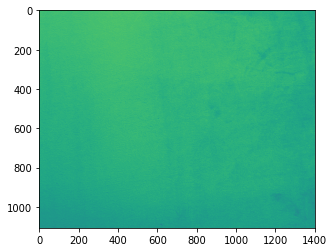

[]
[]
[]
None
True


AttributeError: 'NoneType' object has no attribute 'flatten'

In [6]:
img = cv.imread('retail_corpus_scraper/renamed_images/13972_34_12__1.jpg',cv.IMREAD_GRAYSCALE) 
plt.imshow(img)
plt.show()

sift = cv.SIFT_create()
        
        # Dinding image keypoints
kps = sift.detect(img,None)
print(kps)
        # Getting first 32 of them
        # Number of keypoints is varies depend on image size and color palette
        
        # Sorting them based on keypoint response value(bigger is better)
kps = sorted(kps, key=lambda x: -x.response)[:32]
print(kps)
        # computing descriptors vector
kps, des = sift.compute(img, kps)
print(kps)
print(des)
print(des is None)
        
        # Flatten all of them in one big vector - our feature vector
des = des.flatten()

<class 'numpy.ndarray'>


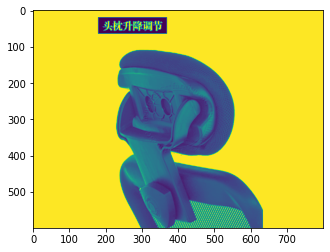

In [7]:
# handling .gif: gif file cannot open or flatten using normal cv.imread()

gif = cv.VideoCapture('retail_corpus_scraper/renamed_images/11006_QXI02-9-800x600_0.gif')
ret, frame = gif.read() # ret=True if the frame is read correctly i.e. finds a frame else False 
# when gif contains only one frame, next read() will give ret=False
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
# img = Image.fromarray(frame)
# img = img.convert('L') # grayscale
print(type(gray))

plt.imshow(gray)
plt.show()

sift = cv.SIFT_create()
kps = sift.detect(gray,None)
kps = sorted(kps, key=lambda x: -x.response)[:32]

kps, des = sift.compute(gray, kps)
# Flatten all of them in one big vector - our feature vector
des = des.flatten()

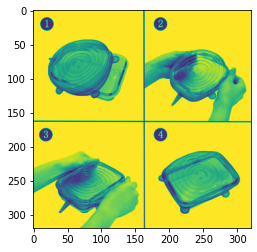

In [8]:
# trying with .jpg None type and None type images (ok with normal cv.imread())

img = cv.imread('retail_corpus_scraper/renamed_images/25982_6e309447314392bbfe56bcba066415b8_tn',cv.IMREAD_GRAYSCALE) 
sift = cv.SIFT_create()
        
        # Dinding image keypoints
kps = sift.detect(img,None)
        # Getting first 32 of them
        # Number of keypoints is varies depend on image size and color palette
        
        # Sorting them based on keypoint response value(bigger is better)
kps = sorted(kps, key=lambda x: -x.response)[:32]
        
        # computing descriptors vector
kps, des = sift.compute(img, kps)
        
        # Flatten all of them in one big vector - our feature vector
des = des.flatten()
        
plt.imshow(img)
plt.show()